In [273]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

def load_data(data_name, data_path = ""):
    csv_path = os.path.join(data_path, data_name)
    return pd.read_csv(csv_path)

In [274]:
games = load_data("games.csv")
games.head()

,GameID,Date,Tournament,TournamentGame,Team,Opponent,Outcome,TeamPoints,TeamPointsAllowed
0,1,2017-11-30,Dubai,1,Canada,Spain,W,19,0
1,2,2017-11-30,Dubai,2,Canada,Ireland,W,31,0
2,3,2017-11-30,Dubai,3,Canada,Fiji,W,31,14
3,4,2017-12-01,Dubai,4,Canada,France,W,24,19
4,5,2017-12-01,Dubai,5,Canada,Australia,L,7,25


In [275]:
wellness = load_data("wellness.csv")
wellness.head()

,Date,PlayerID,Fatigue,Soreness,Desire,Irritability,BedTime,WakeTime,SleepHours,SleepQuality,MonitoringScore,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,USGMeasurement,USG,TrainingReadiness
0,2018-07-21,1,3,3,2,3,23:00:00,07:00:00,8.00,2,13,No,No,Yes,Excellent,Yes,No,NaN,0%
1,2018-07-21,2,4,3,4,4,23:00:00,07:00:00,8.00,4,19,Yes,No,Yes,NaN,NaN,Yes,1.010,0%
2,2018-07-21,3,3,3,5,4,22:30:00,06:30:00,8.00,4,19,No,No,No,NaN,NaN,Yes,1.016,100%
3,2018-07-21,4,2,3,5,4,00:30:00,07:00:00,6.50,1,15,No,No,Yes,Excellent,Yes,Yes,1.025,95%
4,2018-07-21,5,5,3,4,4,23:45:00,07:00:00,7.25,4,20,No,No,No,Okay,Yes,Yes,1.022,100%


In [276]:
rpe = load_data("rpe.csv")
rpe.head()

,Date,PlayerID,Training,SessionType,Duration,RPE,SessionLoad,DailyLoad,AcuteLoad,ChronicLoad,AcuteChronicRatio,ObjectiveRating,FocusRating,BestOutOfMyself
0,2018-07-21,13,Yes,Mobility/Recovery,5.0,0.0,0.0,446.0,323.1,303.25,1.07,NaN,NaN,Not at all
1,2018-07-21,13,Yes,Game,29.0,7.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,Not at all
2,2018-07-21,13,Yes,Game,27.0,9.0,243.0,NaN,NaN,NaN,NaN,NaN,NaN,Not at all
3,2018-07-20,11,Yes,Game,36.0,6.0,216.0,534.0,256.3,344.18,0.74,9.0,10.0,Absolutely
4,2018-07-20,11,Yes,Game,36.0,8.0,288.0,NaN,NaN,NaN,NaN,9.0,10.0,Absolutely


In [277]:
gps = load_data("gps.csv")
gps.head()

,GameID,Half,PlayerID,FrameID,Time,GameClock,Speed,AccelImpulse,AccelLoad,AccelX,AccelY,AccelZ,Longitude,Latitude
0,1,1,2,1,00:22:01,00:00:00,0.658334,0.611112,0.005330,0.13250,0.69875,0.56500,55.466666,24.994873
1,1,1,2,2,00:22:01,00:00:00,0.594445,0.638889,0.006568,0.11125,0.92000,0.70625,55.466666,24.994874
2,1,1,2,3,00:22:01,00:00:00,0.363889,2.305557,0.003114,0.01375,0.77000,0.67750,55.466667,24.994874
3,1,1,2,4,00:22:01,00:00:00,0.444445,0.805556,0.002602,0.00625,0.88625,0.59500,55.466667,24.994874
4,1,1,2,5,00:22:01,00:00:00,0.400000,0.444445,0.003813,-0.01750,0.85750,0.57375,55.466668,24.994874


In [278]:
import numpy as np

rpe["train_load_cat"] = (rpe["ChronicLoad"] / rpe["AcuteLoad"])
rpe["train_load_cat"].where(rpe["train_load_cat"] < 1.2, 1.2, inplace = True)

In [279]:
rpe["train_load_cat"].where(rpe["train_load_cat"] > 0.8, 0.8, inplace = True)

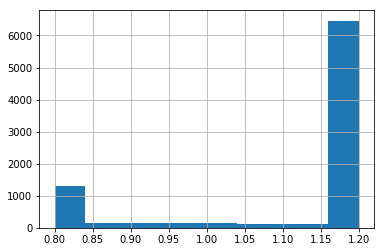

In [280]:
rpe["train_load_cat"].hist()

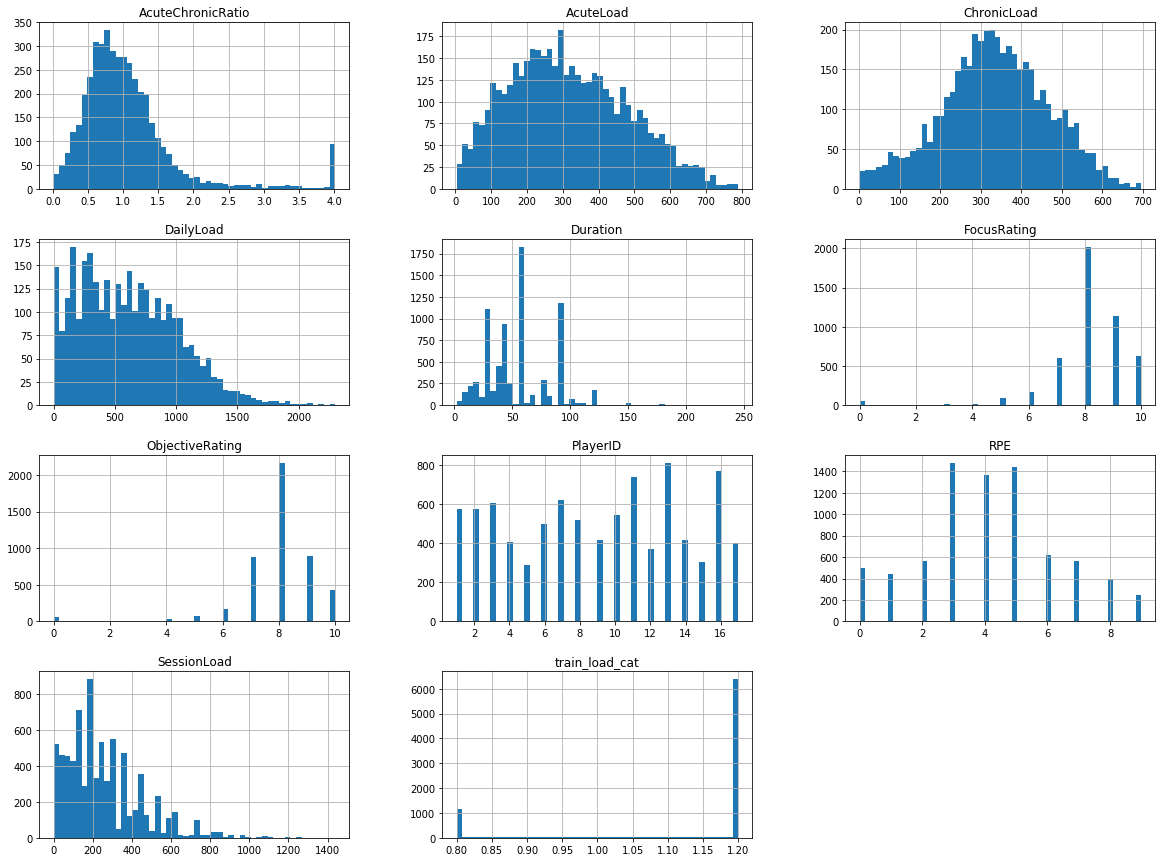

In [281]:
%matplotlib inline
import matplotlib.pyplot as plt
rpe.hist(bins = 50, figsize = (20, 15))
plt.show()

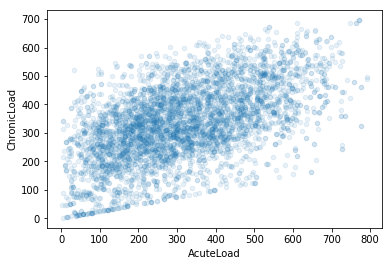

In [282]:
rpe.plot(kind = "scatter", x = "AcuteLoad", y = "ChronicLoad", alpha = 0.1)

In [283]:
wellness.plot(kind = "scatter", x = "Fatigue", y = "ChronicLoad")

KeyError: 'ChronicLoad'

In [ ]:
wellness.plot(kind = "scatter", x = "AcuteLoad", y = "ChronicLoad", alpha = 0.4, figsize = (10, 7),
             c = "Fatigue", cmap = plt.get_cmap("jet"), colorbar = True)

In [ ]:
wellness.plot(kind = "scatter", x = "AcuteLoad", y = "ChronicLoad", alpha = 0.4, figsize = (10, 7),
             c = "Fatigue", cmap = plt.get_cmap("jet"), colorbar = True)

In [284]:
well_pid["PlayerID"].value_counts(1)

13    0.070245
3     0.069447
11    0.069447
16    0.068649
7     0.068449
2     0.067651
10    0.066454
1     0.063261
4     0.061664
8     0.061265
14    0.052884
6     0.052485
5     0.051686
12    0.045899
17    0.045699
9     0.044103
15    0.040710
Name: PlayerID, dtype: float64

In [285]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [286]:
corr_w_matrix = wellness.corr()
corr_w_matrix["Fatigue"].sort_values(ascending = False)

Fatigue            1.000000
MonitoringScore    0.846338
Desire             0.580195
SleepQuality       0.525361
Soreness           0.519904
Irritability       0.481475
SleepHours         0.185780
PlayerID           0.014598
USG               -0.057746
Name: Fatigue, dtype: float64

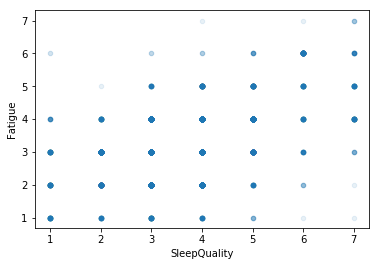

In [287]:
#We noticed that Desire and SleepQuality very closely relate to Fatigue.
#So we are going to plot a graph to see visual correlation.

#SLEEP QUALITY

wellness.plot(kind = "scatter", x = "SleepQuality", y = "Fatigue", alpha = 0.1)

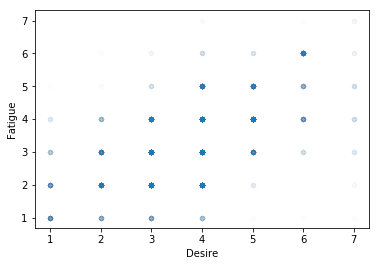

In [288]:
#DESIRE

wellness.plot(kind = "scatter", x = "Desire", y = "Fatigue", alpha = 0.01)

In [289]:
rpe["Desire"] = wellness["Desire"]

corr_r_matrix = rpe.corr()

corr_r_matrix["Desire"].sort_values(ascending = False)

Desire               1.000000
ChronicLoad          0.046190
DailyLoad            0.040594
AcuteLoad            0.039011
PlayerID             0.023199
AcuteChronicRatio    0.010706
ObjectiveRating      0.007318
FocusRating          0.004785
SessionLoad          0.004655
RPE                  0.002374
Duration            -0.001202
train_load_cat      -0.012566
Name: Desire, dtype: float64

In [290]:
games["Desire"] = wellness["Desire"]

corr_g_matrix = games.corr()

corr_g_matrix["Desire"].sort_values(ascending = False)

Desire               1.000000
TournamentGame       0.355174
TeamPointsAllowed    0.266791
GameID               0.001144
TeamPoints          -0.155834
Name: Desire, dtype: float64

In [291]:
gps["Desire"] = wellness["Desire"]

corr_gp_matrix = gps.corr()

corr_gp_matrix["Desire"].sort_values(ascending = False)

Desire          1.000000
FrameID         0.146383
Latitude        0.129942
Speed           0.121774
Longitude       0.107475
AccelLoad       0.089182
AccelImpulse    0.051251
AccelY          0.009660
AccelX          0.001353
AccelZ         -0.029700
GameID               NaN
Half                 NaN
PlayerID             NaN
Name: Desire, dtype: float64

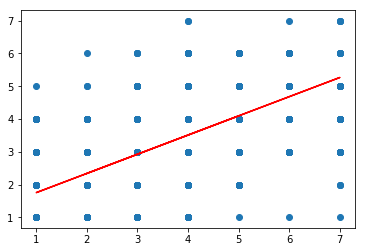

In [292]:
from sklearn.linear_model import LinearRegression

X = wellness["Desire"].values.reshape(-1, 1)  # values converts it into a numpy array
Y = wellness["Fatigue"].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()


In [293]:
#TESTING FILTER

games[games["GameID"] == 1]

,GameID,Date,Tournament,TournamentGame,Team,Opponent,Outcome,TeamPoints,TeamPointsAllowed,Desire
0,1,2017-11-30,Dubai,1,Canada,Spain,W,19,0,2


In [294]:
#WE WANT TO FILTER THE PLAYERS DESIRE ON TOURNAMENTS AND DESIRE THE REST OF THE TIME
dates = ["2017-11-29", "2017-12-02", "2018-01-25", "2018-01-29", "2018-04-13", "2018-04-16", "2018-04-20",
         "2018-04-23", "2018-05-11", "2018-05-14", "2018-06-07", "2018-06-11", "2018-07-19"]

tourn_wellness = pd.concat([wellness[wellness["Date"] == date] for date in dates])
display(tourn_wellness)


,Date,PlayerID,Fatigue,Soreness,Desire,Irritability,BedTime,WakeTime,SleepHours,SleepQuality,MonitoringScore,Pain,Illness,Menstruation,Nutrition,NutritionAdjustment,USGMeasurement,USG,TrainingReadiness
3199,2017-11-29,1,2,3,2,4,22:30:00,06:00:00,7.50,5,16,No,No,No,Excellent,Yes,No,NaN,80%
3200,2017-11-29,3,4,4,4,4,21:30:00,05:30:00,8.00,4,20,No,No,No,Excellent,Yes,Yes,1.015,100%
3201,2017-11-29,4,3,4,4,4,22:00:00,07:30:00,9.50,3,18,No,No,No,Excellent,Yes,Yes,1.017,100%
3202,2017-11-29,5,4,3,5,4,23:00:00,07:00:00,8.00,4,20,No,No,No,Okay,Yes,No,NaN,95%
3203,2017-11-29,6,4,4,4,4,22:00:00,07:45:00,9.75,4,20,No,No,No,NaN,NaN,Yes,1.012,90%
3204,2017-11-29,7,4,4,5,4,21:30:00,05:30:00,8.00,4,21,No,No,No,Excellent,Yes,Yes,1.014,100%
3205,2017-11-29,8,6,5,6,3,22:00:00,05:45:00,7.75,5,25,No,No,No,Excellent,Yes,Yes,1.013,100%
3206,2017-11-29,9,6,6,6,6,22:00:00,07:30:00,9.50,6,30,No,No,No,Excellent,Yes,Yes,1.008,95%
3207,2017-11-29,10,3,4,4,4,22:00:00,06:45:00,8.75,4,19,Yes,No,No,Excellent,Yes,Yes,1.013,90%
3208,2017-11-29,11,3,3,4,4,22:00:00,06:00:00,8.00,4,18,No,No,No,Excellent,Yes,Yes,1.014,100%


In [295]:
tourn_wellness.count()

Date                   171
PlayerID               171
Fatigue                171
Soreness               171
Desire                 171
Irritability           171
BedTime                171
WakeTime               171
SleepHours             171
SleepQuality           171
MonitoringScore        171
Pain                   171
Illness                171
Menstruation           170
Nutrition              139
NutritionAdjustment    139
USGMeasurement         171
USG                     79
TrainingReadiness      171
dtype: int64

In [296]:
#tourn_wellness.head(100).plot.bar(x = "Date", y = "Desire", figsize=(15,5))

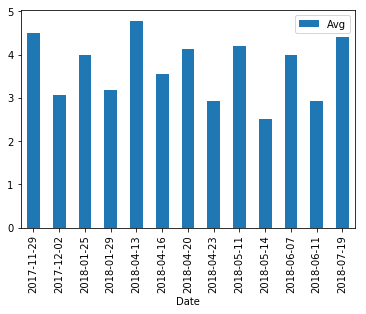

In [297]:
avgs = []
for date in dates:
    curr_date = tourn_wellness['Desire'][tourn_wellness["Date"] == date]
    avgs.append(curr_date.sum() / len(curr_date))



avg_df = pd.DataFrame({
    'Date': dates,
    "Avg": avgs
})
avg_df.plot.bar(x='Date', y='Avg')

In [298]:
print(avgs)

[4.5, 3.0714285714285716, 4.0, 3.1818181818181817, 4.785714285714286, 3.5454545454545454, 4.133333333333334, 2.9166666666666665, 4.2, 2.5, 4.0, 2.9166666666666665, 4.416666666666667]


In [ ]:
5r5rrrrrrr55rrrrrr5rrr